# Homework 05

### Task 1

Write your own Simpson method to numerically calculate integral 

`my_simps(some_func,a,b,n)`
* some_func
* a: left limit 
* b: right limit
* n: number of segments
for example:

#### for any a,b,n, func

### example

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

def some_func(x):
    return np.exp(x)

In [2]:
a=1.5
b=2.5
n=4

In [3]:
def my_simps(some_func,a,b,n):

    #  your code here
    h= (b-a)/n
    xi=a
    x_1=xi+h
    x_2=xi+2*h
    x_3=xi+3*h
    x_4=xi+4*h

    I= (h/3)*(some_func(xi)+4*some_func(x_1)+2*some_func(x_2)+4*some_func(x_3)+some_func(x_4))
    return I

In [4]:
I=my_simps(some_func,a,b,n)
print(I)
print()


I_quad,error=integrate.quad(some_func,a,b)
print(I_quad, 'error: ', error)

7.700970773196655

7.70080489036541 error:  8.549610897429682e-14


### Task 2

Solve the following integral numerically

$$I = \int_{1}^{9} \frac{b x^2 + x^2 \sqrt(x) - 1}{x^2} dx$$

Initially b=2

Then make a plot for $I$ vs 10 different values of b=[0,1,2,3,4,5,6,7,8,9] 

In [5]:
#vamos a hacer la integral teniendo varios valores de b
A = 1
B = 9
b = [0,1,2,3,4,5,6,7,8,9]
b = np.array(b)
n = 100000

In [11]:
def integral1(x,c):
  return (c*x**2+(x**2)*np.sqrt(x)-1)/(x**2)

In [12]:
def simps(integral1,A,B,n,c): 
    h = (B-A)/n
    xi = A
    x = []
    for i in range(n+1):
      x_1 = xi + i*h
      x.append(x_1)
    x = np.array(x)

    I_sum = integral1(x[0],c) + integral1(x[-1],c)

    for j in range(1,len(x)):
      if j%2 == 1:
        I_j =  4*integral1(x[j],c) 
        I_sum = I_sum + I_j
      elif j%2 == 0:
        I_j = 2*integral1(x[j],c)
        I_sum = I_sum + I_j
    I = (h/3)*I_sum

    return I

In [13]:
fc = []
for k in b:
  I_i = simps(integral1,A,B,n,k)
  fc.append(I_i)

fc = np.array(fc)
print(fc)

[16.44460379 24.44465712 32.44471045 40.44476379 48.44481712 56.44487045
 64.44492379 72.44497712 80.44503045 88.44508379]


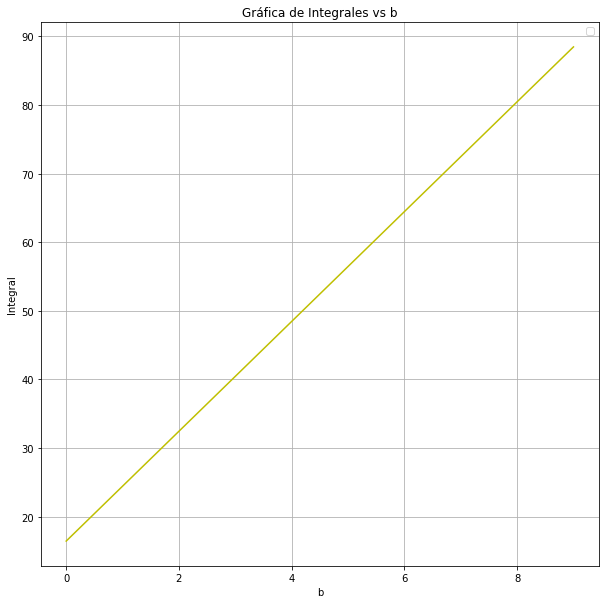

In [14]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.plot(b,fc,'-y')
ax.grid('True')
ax.set_xlabel('b')
ax.set_ylabel('Integral')
plt.title('Gráfica de Integrales vs b')
ax.legend()